# Sesión 03
> Por Christian Rubio Montiel (CRM), implementación por Josue Río Campos Becerra y CRM

En esta sesión se introduce la notación asintótica, se implementa y se calcula el tiempo de ejecución de Insertion Sort en notación asintótica, se realiza una experimentación sobre distintas entradas y se puntualizan conceptos sobre tiempo de ejecución, peor caso y algoritmo eficiente. Se aborda el uso de números en Julia: [Números](https://www.dropbox.com/s/5uj1dwq2rifqwg0/Numeros.ipynb?dl=0).

<a id='indice'></a>
### Índice
---
1. **[Notación asintótica](#notacion)**
2. **[Análisis de INSERTION-SORT](#analisis)**
    1. **[Implementación](#implementacion)**
    2. **[Experimentación en el tiempo de ejecución](#experimentacion)**
3. **[Referencias](#referencias)**
---

<a id='notacion'></a>
## 1. Notación asintótica

La notación asintótica nos facilita entender la eficiencia de los algoritmos, sin embargo, aprender a usarla requiere cierta madurez en el manejo de funciones. Por un lado, es muy útil observar la estrecha relación con el concepto de límite en matemáticas, o con la terminología "suficientemente grande". Por otro lado, el uso de la notación asintótica es frecuente en computación donde se suele hacer "abuso de notación".

Los algoritmos reciben entradas discretas, por lo que naturalmente se emplean funciones discretas que cuentan el número de operaciones primitivas (operaciones de **tiempo constante**) en función del tamaño de la entrada, comunmente $n$. Entonces, el uso de la notación asintótica se reserva para funciones con dominio en los naturales $\mathbb{N}$ que asintóticamente son no-negativas (sólo trabajamos en el primer cuadrante), aunque para facilidad de uso las extendemos a funciones sobre $\mathbb{R}$, tal conjunto es nuestro universo de funciones $X$.

Sean $g$ y $f$ funciones en $X$. Definimos $\Theta(g(n))=\{f(n)\colon$ existen constantes absolutas positivas $c_1,c_2,n_0$ tal que $0\leq c_1 g(n) \leq f(n) \leq c_2g(n), \forall n\geq n_0 \}$.

En este punto, hay que aclarar el significado de **constante** en computación y en matemáticas. Una **constante computacional** depende del instrumento en cuestión (calculadora, ordenar, etc.) ya que está en función de los bits asignados. Así que una instrucción (u operación primitiva) deja de serlo si sobrepasa este máximo de bits asignados. Para distinguir el concepto de constante matemática, usamos el término **constante absoluta** que es una constante de valor fijo.



<img src="Fig031.png" alt="Figura 2" width="250"/>

> `Figura 2: Gráfica que ejemplifica los elementos de la notación theta, ver [2].`

- *El profesor puede hacer referencia que se trata de "ensanwichar a la función $f$ con la función $g$".*

Formalmente, escribiríamos que $2n^2+n\in \Theta(n^2)$ (ya que es un conjunto) pero lo común es escribir $2n^2+n= \Theta(n^2)$. En este caso, la notación **theta** significa asintóticamente equivalentes, es decir, que crecen de forma "similar". En este sentido, $2n+5\not= \Theta (n^2)$ ya que a partir de cierto valor $n_0$, la función $n^2$ siempre quedará por encima de la función lineal $2n+5$ sin importar la constante absoluta dada $c_1$.

Está claro que $\underset{n\rightarrow\infty}{\lim}\frac{n^{2}}{2n+5}$ diverge a $\infty$.

Sean $g$ y $f$ funciones en $X$. Definimos $O(g(n))=\{f(n)\colon$ existen constantes absolutas positivas $c_2,n_0$ tal que $0\leq f(n) \leq c_2g(n), \forall n\geq n_0 \}$.

Desde luego que $2n^2+n= O(n^2)$ pero este caso también $2n+5 = O(n^2)$ ya que solo se exige la existencia de la constante $c_2$. Sin embargo, $n^2\not= O (2n+5)$ ya que una función lineal es asintóticamente menor que cualquier función cuadrática en $X$. A esta notación se le suele llamar "O grande" (big-oh en ingles) o simplemente "O".

- *El profesor puede dibujar el gráfico correspondiente de la notación O análogo a la figura 3, y puede hacer referencia que se trata de "ensanwichar a la función $f$ con la función $g$ solo con la tapa superior".*

- *En esta parte, el profesor puede preguntar si se podrá hacer algo similar, pero con la referencia de "ensanwichar a la función $f$ con la función $g$ pero solo con la tapa inferior".*

Sean $g$ y $f$ funciones en $X$. Definimos $\Omega(g(n))=\{f(n)\colon$ existen constantes absolutas positivas $c_1,n_0$ tal que $0\leq c_1g(n) \leq f(n), \forall n\geq n_0 \}$.

Siguiendo la misma notación, $2n^2+n = \Omega(n^2)$ ya que solo se exige la existencia de la constante $c_1$. Además, $n^2= \Omega (2n+5)$ ya que una función lineal es asintóticamente menor que cualquier función cuadrática en $X$. A esta notación se le suele llamar "omega grande" o simplemente $\Omega$.

- *El profesor puede dibujar el gráfico correspondiente de la notación $\Omega$ análogo a la figura 3.*

Aquí, son útiles las siguientes observaciones:
- $f(n)=O(g(n)) \Leftrightarrow g(n)=\Omega (f(n)) $,
- $ O(g(n))\cap \Omega(g(n))=\Theta(g(n)) $,
- $ O(g(n))\cup \Omega(g(n))=X $,
- Si $f(n)=O(g(n))$ y $g(n)=O(h(n))$ entonces $f(n)=O(h(n))$,
- Si $f(n)=\Omega(g(n))$ y $g(n)=\Omega(h(n))$ entonces $f(n)=\Omega(h(n))$,
- Y que la notación asintótica es una relación de orden donde $\Theta$ equivale a $\approx$, $O$ equivale a $\preceq$ y $\Omega$ equivale a $\succeq$.
- En este caso, ¿cómo definirían a $\prec$ y a $\succ$?

Desde el punto de vista de relación de orden, $\succ$ sería la negación de $\preceq$, esto es, $\omega(g(n))=X\setminus O(g(n))$.

- *El profesor puede pedir la negación del conjunto $O(g(n))$ para obtener la definición conjuntista de $\omega(g(n))$.*

Sean $g$ y $f$ funciones en $X$. Definimos $\omega(g(n))=\{f(n)\colon$ $\forall c_1$ constante absoluta positiva, existe $n_0$ positiva tal que $0\leq c_1g(n) < f(n), \forall n\geq n_0 \}$.

Entonces, $2n^2+n \not= \omega(n^2)$ ya que son asintóticamente iguales, $n^2= \omega (2n+5)$ ya que una función lineal es asintótica y estrictamente menor que cualquier función cuadrática en $X$.

Desde el punto de vista de relación de orden, $\prec$ sería la negación de $\succeq$, esto es, $o(g(n))=X\setminus \Omega(g(n))$.

- *Ahora, el profesor puede pedir la negación del conjunto $\Omega(g(n))$ para obtener la definición conjuntista de $o(g(n))$.*

Sean $g$ y $f$ funciones en $X$. Definimos $o(g(n))=\{f(n)\colon$ $\forall c_2$ constante absoluta positiva, existe $n_0$ positiva tal que $0\leq f(n) < c_2g(n), \forall n\geq n_0 \}$.

Entonces, $2n^2+n \not= o(n^2)$ ya que son asintóticamente iguales, $2n+5= o (n^2)$ ya que una función lineal es asintóticamente estrictamente menor que cualquier función cuadrática en $X$.

Otras observaciones útiles son:
- $f(n)=o(g(n)) \Leftrightarrow g(n)=\omega (f(n)) $,
- $ o(g(n))\cap \omega(g(n))=\emptyset$,
- $ o(g(n))\cup \omega(g(n))=X\setminus \Theta(g(n)) $,
- Si $f(n)=o(g(n))$ y $g(n)=o(h(n))$ entonces $f(n)=o(h(n))$,
- Si $f(n)=\omega(g(n))$ y $g(n)=\omega(h(n))$ entonces $f(n)=\omega(h(n))$,
- $O(g(n))\setminus \Theta(g(n))=o(g(n))$,
- $\Omega(g(n))\setminus \Theta(g(n))=\omega(g(n))$.

En el uso de la notación asintótica se usa frecuentemente la función logaritmo. Recomiendo el siguiente recurso acerca del razonamiento logarítmico.
- Video sobre logaritmos [liga](https://youtu.be/qKf2EwInKbA)

Si el alumno tiene dudas con las propiedades básicas puede consultar el siguiente recurso.
- Video sobre propiedades básicas de logaritmos [liga](https://youtu.be/Zw5t6BTQYRU)
- Video sobre la historia de los logaritmos [liga](https://youtu.be/kvBWXRroy-I)

Regresar al **[Índice](#indice)**.

<a id='analisis'></a>
## 2. Análisis de INSERTION-SORT

Como ya vimos en la sesión anterior, el pseudocódigo de INSERTION-SORT recibe como entrada un arreglo $A$ de $n$ números y es el siguiente:

*INSERTION-SORT($A$)*
1. **for** $j=2$ **to** $n$ **do**
2. $\hspace{0.3cm}key=a_j$
3. $\hspace{0.3cm}i=j-1$
4. $\hspace{0.3cm}$**while** $i>0$ y $a_i>key$
5. $\hspace{1cm}a_{i+1}=a_i$
6. $\hspace{1cm}i=i-1$
7. $\hspace{0.3cm}a_{i+1}=key$

La línea 1 del código se ejecuta un ciclo **for** una cantidad lineal de veces en función del tamaño de la entrada, esto es, la línea 1 se ejecuta $\theta(n)$ veces. Lo mismo sucede con las líneas 2, 3 y 7. Para las líneas 4, 5 y 6 no queda claro cuantas veces se ejecutan, pero en el peor caso será un número lineal, esto es $O(n)$ en cada ocasión, es decir $O(n)\times O(n)=O(n^2)$.

- *El profesor puede hacer alusión a que la suma de Gauss es cuadrática, que se obtiene en el peor caso de las líneas 4, 5 y 6.*

Como al sumar los tiempos de ejecución línea a línea, los sumandos son $\theta(n)$ y $O(n^2)$, cuya suma corresponde a una función cuadrática $O(n^2)$ lo que da el tiempo de ejecución del algoritmo (en su peor caso).

Regresar al **[Índice](#indice)**.

<a id='implementacion'></a>
### A. Implementación

La implementación del algoritmo en el lenguaje de Julia es muy similar. En el código de abajo, los ciclos empleados se les tiene que indicar su término como parte de la sintáxis de Julia. El algoritmo se implementa dentro de una función cuya entrada es un arreglo de números.

In [1]:
function INSERTION_SORT(A)
    for j in 2:length(A)           #línea 1
        key = A[j]                 #línea 2
        i = j-1                    #línea 3
        while i > 0 && A[i] > key  #línea 4
            A[i+1] = A[i]          #línea 5
            i = i-1                #línea 6
        end                        
        A[i+1] = key               #línea 7
    end                                         
end

INSERTION_SORT (generic function with 1 method)

Ahora procedemos a hacer un ejemplo donde se ejecute línea a línea el algoritmo. Considere $A=[5, 2, 4, 6, 1, 3]$ y pida a los alumnos que le vayan diciendo los pasos a seguir. Ver [Insertion Sort Dance](https://youtu.be/ROalU379l3U) a usar el algoritmo con un ejemplo:

In [2]:
A = [5, 2, 4, 6, 1, 3];

In [3]:
INSERTION_SORT(A)
A

6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6

Regresar al **[Índice](#indice)**.

<a id='experimentacion'></a>
### B. Experimentación en el tiempo de ejecución

Haremos uso de los siguientes paquetes.

In [4]:
using Plots

Vamos a realizar 16 ejecuciones del algoritmo para entradas Aj de tamaño 10000j con entradas aleatorias con $j\in\{1,\dots,16\}$.

In [5]:
y = []
for j in 1:16
    yj = @elapsed INSERTION_SORT(rand(10000*j))
    push!(y,yj)
    println(10000*j," ",yj)
end

10000 0.010014791
20000 0.040581791
30000 0.092198875
40000 0.164540916
50000 0.257050791
60000 0.365381042
70000 0.494913292
80000 0.651674208
90000 0.836030875
100000 1.02299925
110000 1.228115375
120000 1.454822875
130000 1.697401792
140000 1.973590417
150000 2.249591667
160000 2.563641125


A continuación, graficaremos los puntos $(n,time)$ donde $n$ corresponde al tamaño del arreglo y para fines prácticos, redondearemos los tiempos. 

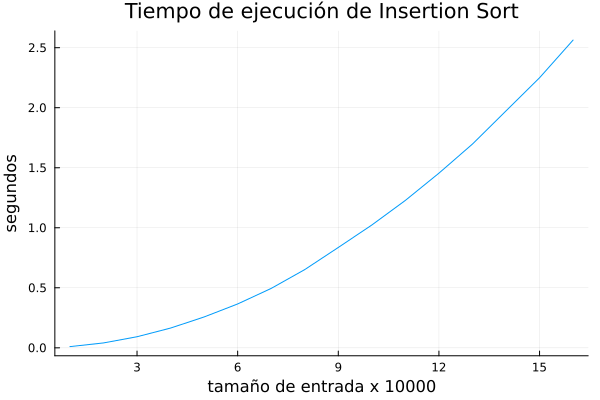

In [6]:
x = range(1, 16, length = 16)
plot(x, y, legend = false)
xaxis!("tamaño de entrada x 10000")
yaxis!("segundos")
title!("Tiempo de ejecución de Insertion Sort")

De acuerdo a nuestro análisis, el tiempo de INSERTION-SORT es cuadrático, así que ahora ajustaremos una curva cuadrática vía mínimos cuadrados (en color rojo) y la dibujaremos encima de la curva azul, ver [$[1]$](#referencias).

In [7]:
M = zeros(Int64, 3, 3)
M[1, 1] = 16
M[1, 2] = sum(x)
M[1, 3] = sum(x .^ 2)
M[2, 1] = sum(x)
M[2, 2] = sum(x .^ 2)
M[2, 3] = sum(x .^ 3)
M[3, 1] = sum(x .^ 2)
M[3, 2] = sum(x .^ 3)
M[3, 3] = sum(x .^ 4)
S=M^(-1)*[sum(y), sum(y.*x), sum(y.*(x.^2))]

3-element Vector{Float64}:
 -0.010203810457144025
  0.005348503621009431
  0.009718190880252098

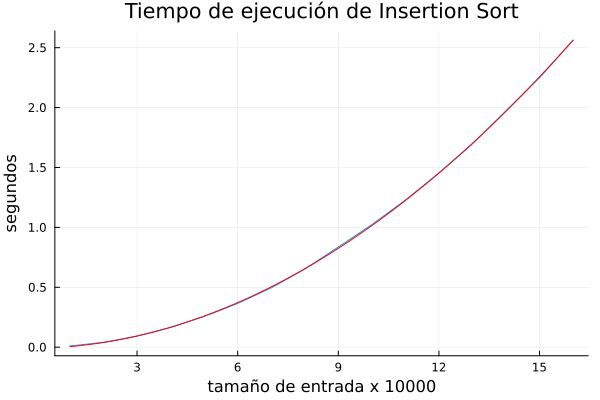

In [8]:
P(x) = S[1]+S[2]*x+S[3]*x^2

w = range(1, 16, length = 1000)
z = P.(w)
plot!(w, z, color = :red)

Regresar al **[Índice](#indice)**.

<a id='referencias'></a>
## 3. Referencias

$[1]$ Burden, R. L., Faires, J. D., Rurden, A. (2015). **Numerical analysis**. Cengage Learning, 10E.

$[2]$ Cormen, T. H., Leiserson, C. E., Rivest, R. L. y Stein C. (2022). **Introduction to algorithms**. MIT Press, 4E.